# Education Data Analysis and Visualization

This notebook demonstrates various visualizations of education data across EU countries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plotting style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Configure plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Load and Prepare Data

In [2]:
# Load the education data
data_path = '../features/education_data/data/processed/education_data.csv'
df = pd.read_csv(data_path)

# Convert year to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Display the first few rows and basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   20 non-null     datetime64[ns]
 1   country                20 non-null     object        
 2   education_investment   20 non-null     float64       
 3   student_teacher_ratio  20 non-null     float64       
 4   completion_rate        20 non-null     float64       
 5   literacy_rate          20 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ KB
None

First few rows:


,year,country,education_investment,student_teacher_ratio,completion_rate,literacy_rate
0,2015-01-01,France,5.5,18.2,95.3,99.0
1,2016-01-01,France,5.6,17.8,95.8,99.0
2,2017-01-01,France,5.4,17.5,96.1,99.0
3,2018-01-01,France,5.3,17.2,96.5,99.0
4,2019-01-01,France,5.4,17.0,96.8,99.0


## Investment Trends Visualization

In [3]:
def plot_investment_trends():
    # Create line plot for investment trends
    fig = px.line(df, 
                  x='year', 
                  y='education_investment',
                  color='country',
                  title='Education Investment Trends by Country')
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Investment (% of GDP)',
        showlegend=True
    )
    
    fig.show()

plot_investment_trends()

## Quality Metrics Analysis

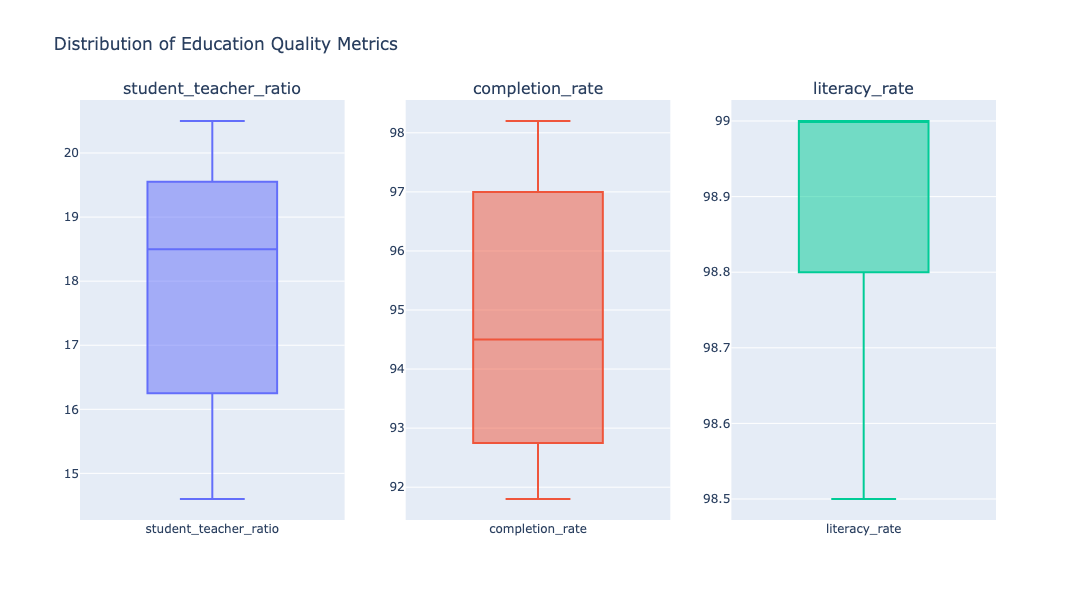

In [4]:
def plot_quality_metrics():
    # Create box plots for quality metrics
    metrics = ['student_teacher_ratio', 'completion_rate', 'literacy_rate']
    
    fig = make_subplots(rows=1, cols=len(metrics),
                        subplot_titles=metrics)
    
    for i, metric in enumerate(metrics, 1):
        fig.add_trace(
            go.Box(y=df[metric], name=metric),
            row=1, col=i
        )
    
    fig.update_layout(
        title_text='Distribution of Education Quality Metrics',
        showlegend=False,
        height=600
    )
    
    fig.show()

plot_quality_metrics()

## Correlation Analysis

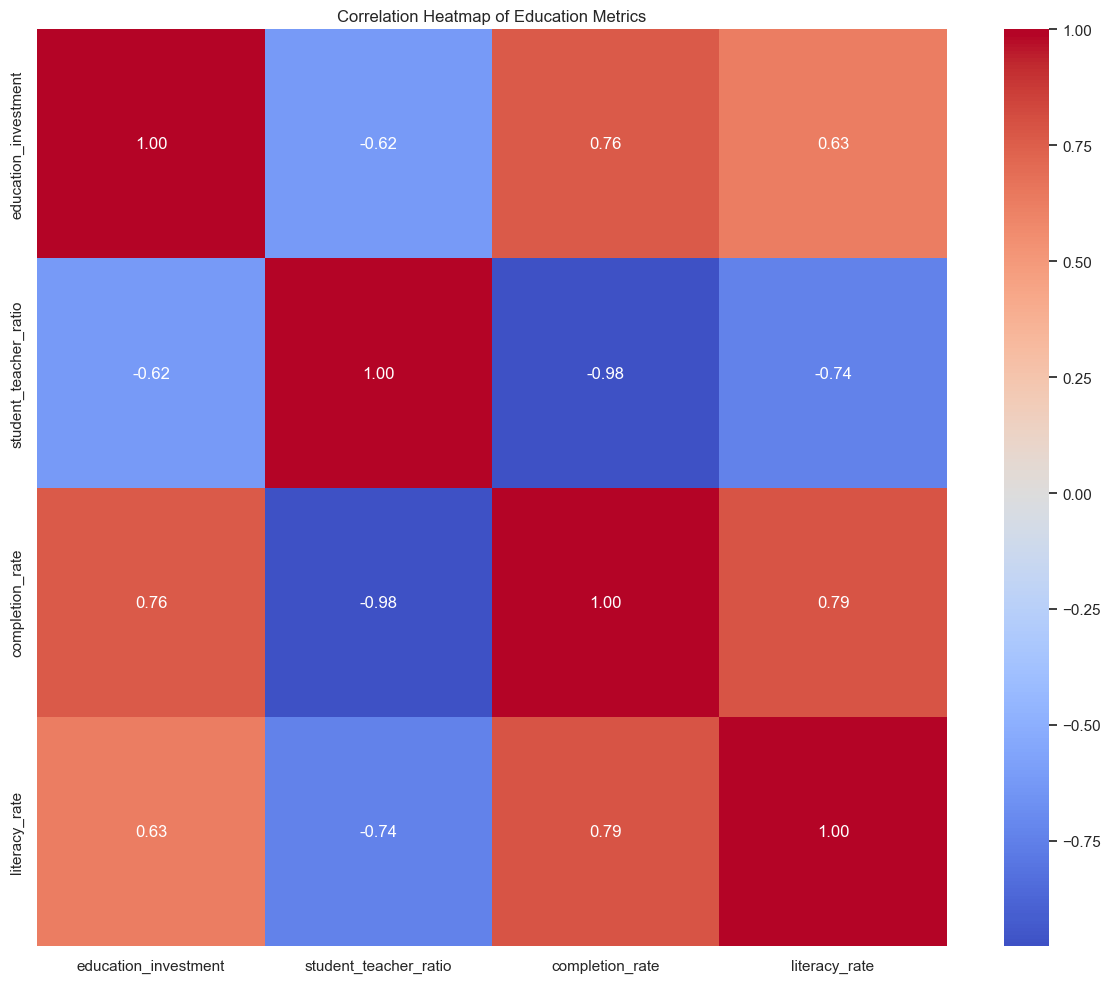

In [5]:
def plot_correlation_heatmap():
    # Calculate correlation matrix
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, 
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f')
    
    plt.title('Correlation Heatmap of Education Metrics')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap()

## Interactive Dashboard

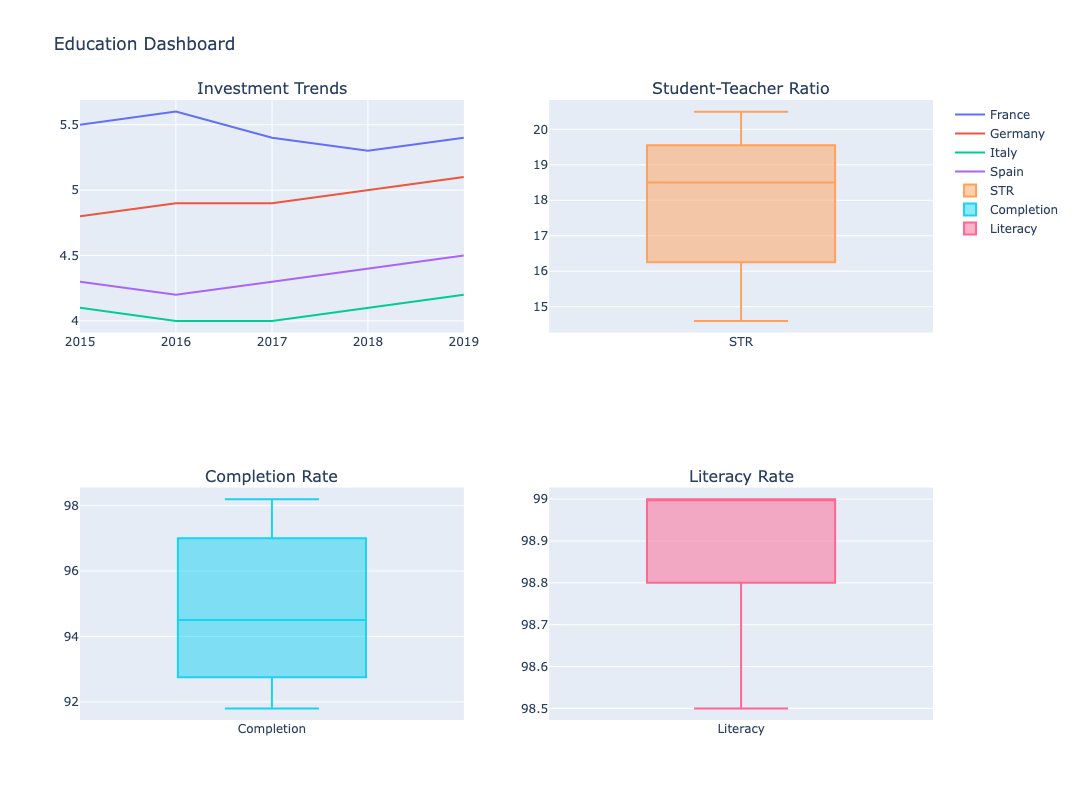

In [6]:
def create_dashboard():
    # Create subplot figure
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Investment Trends',
            'Student-Teacher Ratio',
            'Completion Rate',
            'Literacy Rate'
        )
    )
    
    # Add investment trends
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        fig.add_trace(
            go.Scatter(x=country_data['year'], 
                      y=country_data['education_investment'],
                      name=country,
                      mode='lines'),
            row=1, col=1
        )
    
    # Add other metrics
    fig.add_trace(
        go.Box(y=df['student_teacher_ratio'], name='STR'),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Box(y=df['completion_rate'], name='Completion'),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Box(y=df['literacy_rate'], name='Literacy'),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800,
        title_text='Education Dashboard',
        showlegend=True
    )
    
    fig.show()

create_dashboard()